# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_1 = pd.read_csv('instacart_orders.csv', sep=';')
df_2 = pd.read_csv('products.csv', sep=';')
df_3 = pd.read_csv('order_products.csv', sep=';')
df_4 = pd.read_csv('aisles.csv', sep=';')
df_5 = pd.read_csv('departments.csv', sep=';')

In [4]:
df_1.info()
df_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [5]:
df_2.info()
df_2.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [6]:
df_3.info()
df_3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [7]:
df_4.info()
df_4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [8]:
df_5.info()
df_5.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Tenemos que eliminar valores duplicados, y evaluar qué valores nulos deben eliminarse para que el análisis se lleve de manera correcta según el objetivo del proyecto.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
df_1.duplicated().sum()


np.int64(15)

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [10]:
duplicates = df_1[df_1.duplicated(keep=False)]

print(duplicates)

# Basándote en tus hallazgos, hay 15 valores repetidos y en total 30 filas que contienen duplicados, tenemos que eliminar repeticiones y luego revisar si para el análisis necesitamos eliminar valores ausentes.
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.: al verificar que en efecto todos estos valores contienen duplicados nos puede llevar a hacer una primera asunción de que estos valores se duplican por error de la plataforma ese día a esa hora.


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Qué sugiere este resultado?

In [11]:
df_1.drop_duplicates(inplace=True)



In [12]:
duplicates = df_1.duplicated().sum()

print(duplicates)

# Vuelve a verificar si hay filas duplicadas


0


In [13]:
df_1['user_id'].duplicated().sum()


# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


np.int64(321515)

Describe brevemente tus hallazgos y lo que hiciste con ellos:

Realmente no hay nada que hacer, es solo una muestra de que hay usuarios que vuelven a comprar en la plataforma, lo que podríamos hacer con esto es ver qué usuarios compran más y premiarlos, o qué usuarios compran menos e insentivarlos, pero no es nada malo perse, y no tiene mucho de qué hacerle en particular hasta que haya una instrucción de analisis diferente a la actual.

### `products` data frame

In [14]:
df_2.duplicated().sum()


np.int64(0)

In [15]:
df_2['department_id'].duplicated().sum() #en efecto hay duplicados, no afecta realmente


np.int64(49673)

In [16]:
df_2['product_name'].str.upper().duplicated().sum()

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


np.int64(1361)

In [17]:
productos_no_faltantes = df_2['product_name'].dropna()

productos_no_faltantes.str.upper().duplicated().sum()

# Revisa si hay nombres duplicados de productos no faltantes


np.int64(104)

Describe brevemente tus hallazgos y lo que hiciste con ellos:

Sinceramente los hallazgos son muy generales, pero sí es importante ver que faltan muchos datos en products name, creo que si el analisis lo requiere debo poder eliminar fácilmente los productos faltantes para que el análisis sea más preciso cuando busque el tema de los productos, por ahora no he hecho mayor cosa ya que debo analisar lo que se requiere más adelante.

### `departments` data frame

In [18]:
df_5.duplicated().sum()

# Revisa si hay filas totalmente duplicadas

np.int64(0)

In [19]:
df_5['department_id'].duplicated().sum()

# Revisa únicamente si hay IDs duplicadas de productos

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados y no debemos preocuparnos mucho por el DataFrame.

### `aisles` data frame

In [20]:
df_4.duplicated().sum()

# Revisa si hay filas totalmente duplicadas

np.int64(0)

In [21]:
df_4['aisle_id'].duplicated().sum()

# Revisa únicamente si hay IDs duplicadas de pasillos

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay nada duplicado 

### `order_products` data frame

In [22]:
df_3.duplicated().sum()

# Revisa si hay filas totalmente duplicadas


np.int64(0)

In [23]:
df_3['order_id'].duplicated().sum()


# Vuelve a verificar si hay cualquier otro duplicado engañoso


np.int64(4094961)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Es extraño, cuando llamé a la función nunique me aparecieron apenas más de 400 mil valores únicos, cuando se supone que el número de las entradas superaba los cuatro millones, así que cuando llamé a duplicated().sum() aparece que en realidad hay más de 4 millones de id de ordenes duplicados, aunque pareciera ser normal, porque cada número de orden aparece varias veces porque corresponde a diferentes productos, valdría la pena que si quisieramos analizar por orden poder ordenarlo así, pero si no es necesario y solo queremos promedios generales la base de datos funciona a la perfección como está

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
df_2['product_name'].isnull().sum()



# Encuentra los valores ausentes en la columna 'product_name'

np.int64(1258)

Describe brevemente cuáles son tus hallazgos.

hay más de 1,200 valores ausentes en product_name, esto puede ser un problema a la hora de analisar productos específicos y puede que tengamos que eliminar estas filas en caso de que el analisis lo requiera o renombrarlos a todos con el mismo nombre "otro" para no perder los datos

In [25]:
missing = df_2['product_name'].isnull()

print(df_2[missing])

#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Efectivamente, todos los productos ausentes están relacionados con el departamento 21 y aile_id 100 lo que lo hace curioso y una posible falla, podríamos usar esta referencia para poder facilitar el análisis si no queremos eliminar los datos, para una nomenclatura como "products_aile_100"

In [26]:
missing = df_2['product_name'].isnull()

print(df_2[missing])

# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Efectivamente, todos los productos ausentes están relacionados con el departamento 21 y aile_id 100 lo que lo hace curioso y una posible falla, podríamos usar esta referencia para poder facilitar el análisis si no queremos eliminar los datos, para una nomenclatura como "products_aile_100"

In [27]:
aisles_department = df_2[(df_2['aisle_id'] == 100) & (df_2['department_id'] == 21)]

print(aisles_department)

# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

El error de registro es claro, la gente no coloco correctamente los nombres de los productos del pasillo 100 departamento 21, y pensandolo mejor podemos tratar de omitir los nombres para un analisis inicial y usar sus id ya que esos sí están registrados, pero por el momento tenemos que sustituir el valor ausente por un valor para el analisis

In [28]:
df_2['product_name'].fillna('Unknown', inplace=True)

aisles_department = df_2[(df_2['aisle_id'] == 100) & (df_2['department_id'] == 21)]

print(aisles_department)

# Completa los nombres de productos ausentes con 'Unknown'


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Realmente los valores parece importantes así que no se eliminaron, pero pudimos sustituir los valores por unknown, de igual manera si el inventario desea completarse tendrá que hacerse de manera manual usando de referenca product_id

### `instacart_orders` data frame

In [29]:
df_1.isnull().sum()

# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
null = df_1[df_1['days_since_prior_order'].isnull()]

print(null)

# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausentes que no sean los pedidos que no tengan pedidos anteriores, y lo podemos observar en el DF anteriormente colocado

### `order_products` data frame

In [31]:
df_3.isnull().sum()

# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
min_max = df_3['add_to_cart_order'].min(), df_3['add_to_cart_order'].max()

print(min_max)
# ¿Cuáles son los valores mínimos y máximos en esta columna?


(np.float64(1.0), np.float64(64.0))


Describe brevemente cuáles son tus hallazgos.

El valor mínimo es de 1, asignado al primer producto en el orden de agregados, pero el máximo es 64, mostrando que la plataforma puede tener un problema después del producto 64 para seguir registrando productos, a esta columna

In [33]:
missing_orders = df_3[df_3['add_to_cart_order'].isnull()]

order_with_missing = missing_orders['order_id'].unique()

print(order_with_missing)

# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
problematic_orders = df_3[df_3['order_id'].isin(order_with_missing)] 

sorted_df = problematic_orders.sort_values(by=['order_id', 'add_to_cart_order'])

print(sorted_df)

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

         order_id  product_id  add_to_cart_order  reordered
4520124      9310       32578                1.0          1
2160215      9310       20082                2.0          1
3148360      9310       27966                3.0          1
1806792      9310       18523                4.0          1
990652       9310       42828                5.0          0
...           ...         ...                ...        ...
1038616   3383594       15424                NaN          1
1537276   3383594       15076                NaN          0
2772397   3383594       46710                NaN          0
3760909   3383594          63                NaN          0
3784932   3383594       49144                NaN          1

[5316 rows x 4 columns]


In [35]:
product_counts = sorted_df.groupby('order_id')['add_to_cart_order'].count()

min_count = product_counts.min()

print(min_count)
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


64


Describe brevemente cuáles son tus hallazgos.

Podemos observar que la plataforma no registra nada después de el producto 64 haciendo que sea una perdida de info, podría manualmente cambiar esto pero tardaría muchísimo tiempo, o revisar orden por orden, contar su numero de elementos y complementar, pero se perdería un poco de información en el proceso.

In [36]:
df_3['add_to_cart_order'] = df_3['add_to_cart_order'].fillna(999).astype(int)

print(df_3.isnull().sum())

# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontrando que cada uno de los valores nulos estaba después del 64 la instrucción fue darle el valor 999 a cada valor nulo, para que no se pierda la información que cada uno de estos productos tiene en el DF, supongo para dar un valor neutro y no tener que estar averiguando el orden exacto de las cosas ya que en este caso no es información tan relevante ese orden.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Me costó mucho trabajo el poder llevar a cabo cada una de las cosas, mucho tiempo, pero encontrar los problemas con los valores nulos es importante para que no tengamos información sucia al igual que los valores repetidos, haciendo que las cosas puedan tener un análisis más preciso.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
filter_hour = df_1.query("order_hour_of_day >= 0 and order_hour_of_day <= 23")

print(filter_hour.count())

order_id                  478952
user_id                   478952
order_number              478952
order_dow                 478952
order_hour_of_day         478952
days_since_prior_order    450135
dtype: int64


In [38]:
filter_dow = df_1.query("order_dow >= 0 and order_dow <= 6")

print(filter_dow.count())

order_id                  478952
user_id                   478952
order_number              478952
order_dow                 478952
order_hour_of_day         478952
days_since_prior_order    450135
dtype: int64


Escribe aquí tus conclusiones

Todos los valores son útiles, estando dentro del rango requerido para que sean validos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Number of users by hour of day'}, xlabel='Hour of day', ylabel='Number of users'>

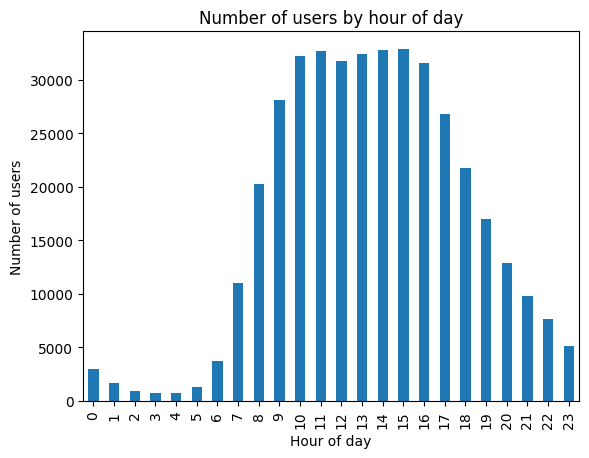

In [40]:
user_counts = df_1.groupby('order_hour_of_day')['user_id'].nunique()

user_counts.plot(kind='bar', xlabel='Hour of day', ylabel='Number of users', title='Number of users by hour of day')

Escribe aquí tus conclusiones: La mayor cantidad de ordenes se realizan entre las 9am y las 5pm la madrugada no es un horario de pedidos altos y podemos ver como la tendencia aumenta desde las 6 am hasta las 11 pm que se calma mayoritaramente todo, siendo la hora con menos pedidos las 4am por poco, es totalmente esperable esta tendencia y no significa que se deba de dejar de atender en la madrugada, sino que podria ajustarse el numero de repartidores a esas horas para satisfacer las necesidades segun la tendencia

### [A3] ¿Qué día de la semana compran víveres las personas?

([<matplotlib.axis.XTick at 0x23264bf07d0>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

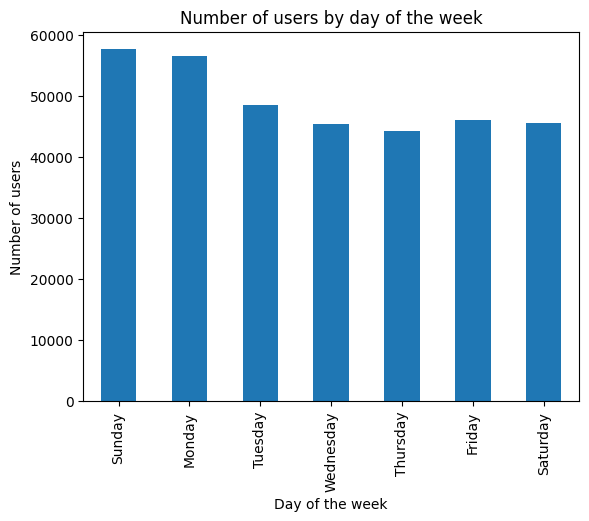

In [47]:
day_counts = df_1.groupby('order_dow')['user_id'].nunique()

day_counts.plot(kind='bar', xlabel='Day of the week', ylabel='Number of users', title='Number of users by day of the week')
plt.xticks(ticks=range(len(day_counts.index)), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

Escribe aquí tus conclusiones: Los días que más se pide son el domungo y el lunes, sorprendentemente el viernes y sabado no apuntan a una aparente tendencia en aumento, pero el domingo y el lunes tienen una curva clara. el Día que menos se pide es el jueves, por poco, Estos datos podrían ayudar a determinar qué día se requiere más actividad de repartidores, siendo la respuesta entre el domingo y el lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<Axes: title={'center': 'Distribución de días entre pedidos'}, xlabel='Días desde el último pedido', ylabel='Número de pedidos'>

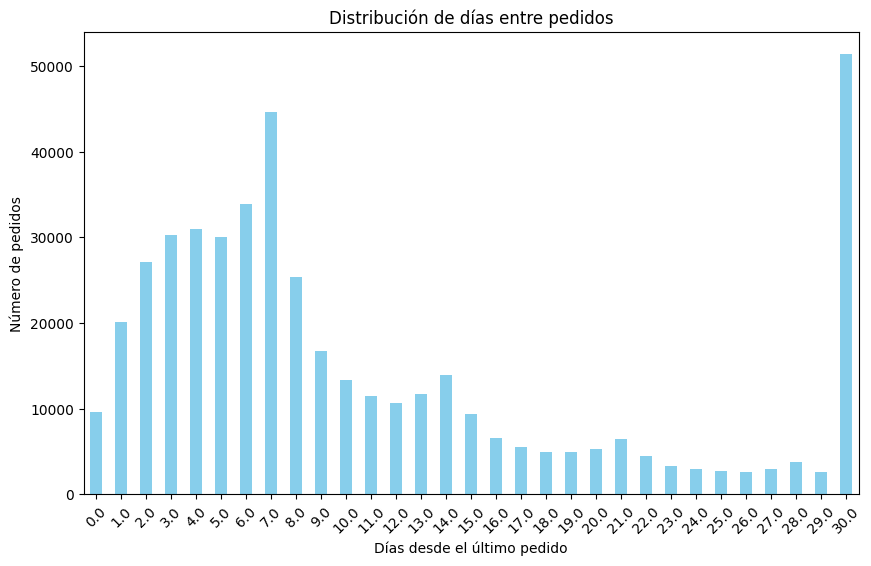

In [50]:
days_distribution = df_1['days_since_prior_order'].value_counts().sort_index()

days_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6), rot=45, xlabel='Días desde el último pedido', ylabel='Número de pedidos', title='Distribución de días entre pedidos')



Escribe aquí tus conclusiones: No sé si el registro aumenta como máximo 30 días desde el último pedido, lo que explicaría por qué el valor máximo se encuentra allá, podría significar 30 días o más sin pedir y ayudaría a entender, lo que además significa que la aplicación tiene un enorme error en no conservar a los compradores y debería incitar a una siguiente compra. Por otro lado los pedidos frecuentes están a los7 días de comprar, lo que explica que hay muchas personas que probablemente están haciendo un pedido semanal con contenidos semejantes y que podrían servirse de algun tema para facilitar su compra programada. ahora, el día 29 pareciera ser el que menos pedidos se muestran en la grafica, mostrando que en efecto, la disperción está rara, y al día siguiente eso se va a sumar al de 30 o más. La mayoría de personas que constantemente compran está entre los 3 y 9 días, siendo aproximadamente una compra cada semana, y ese público se debería de observar más de cerca para saber cómo conservarlo y hacer que sigan comprando por la plataforma.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

([<matplotlib.axis.XTick at 0x232664796d0>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

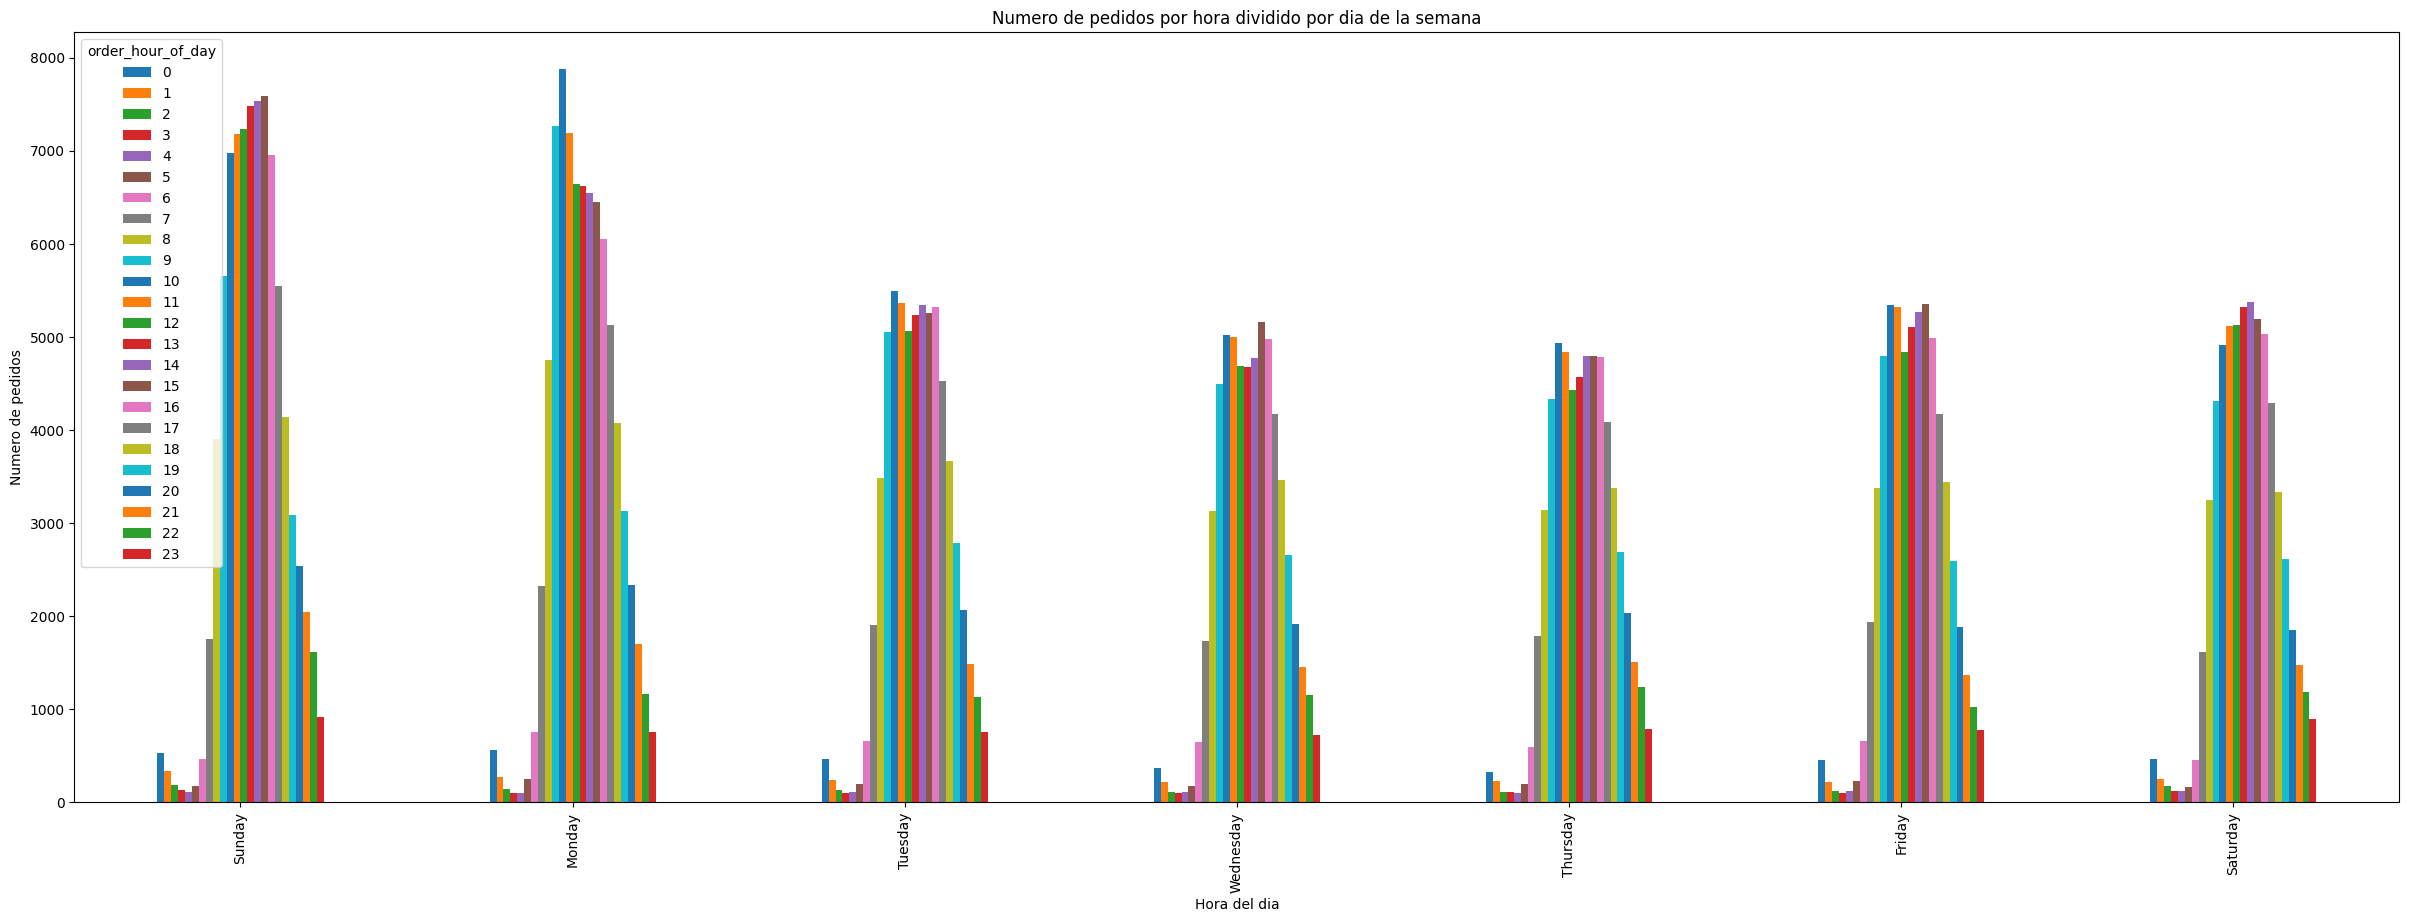

In [61]:
hour_per_day = df_1.groupby(['order_dow', 'order_hour_of_day']).size().unstack()
hour_per_day.plot(kind='bar', xlabel='Hora del dia', ylabel='Numero de pedidos', title='Numero de pedidos por hora dividido por dia de la semana', figsize=(30, 10))
plt.xticks(ticks=range(len(day_counts.index)), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

<Axes: title={'center': 'Numero de pedidos por hora dividido por dia de la semana'}, xlabel='Hora del dia', ylabel='Numero de pedidos'>

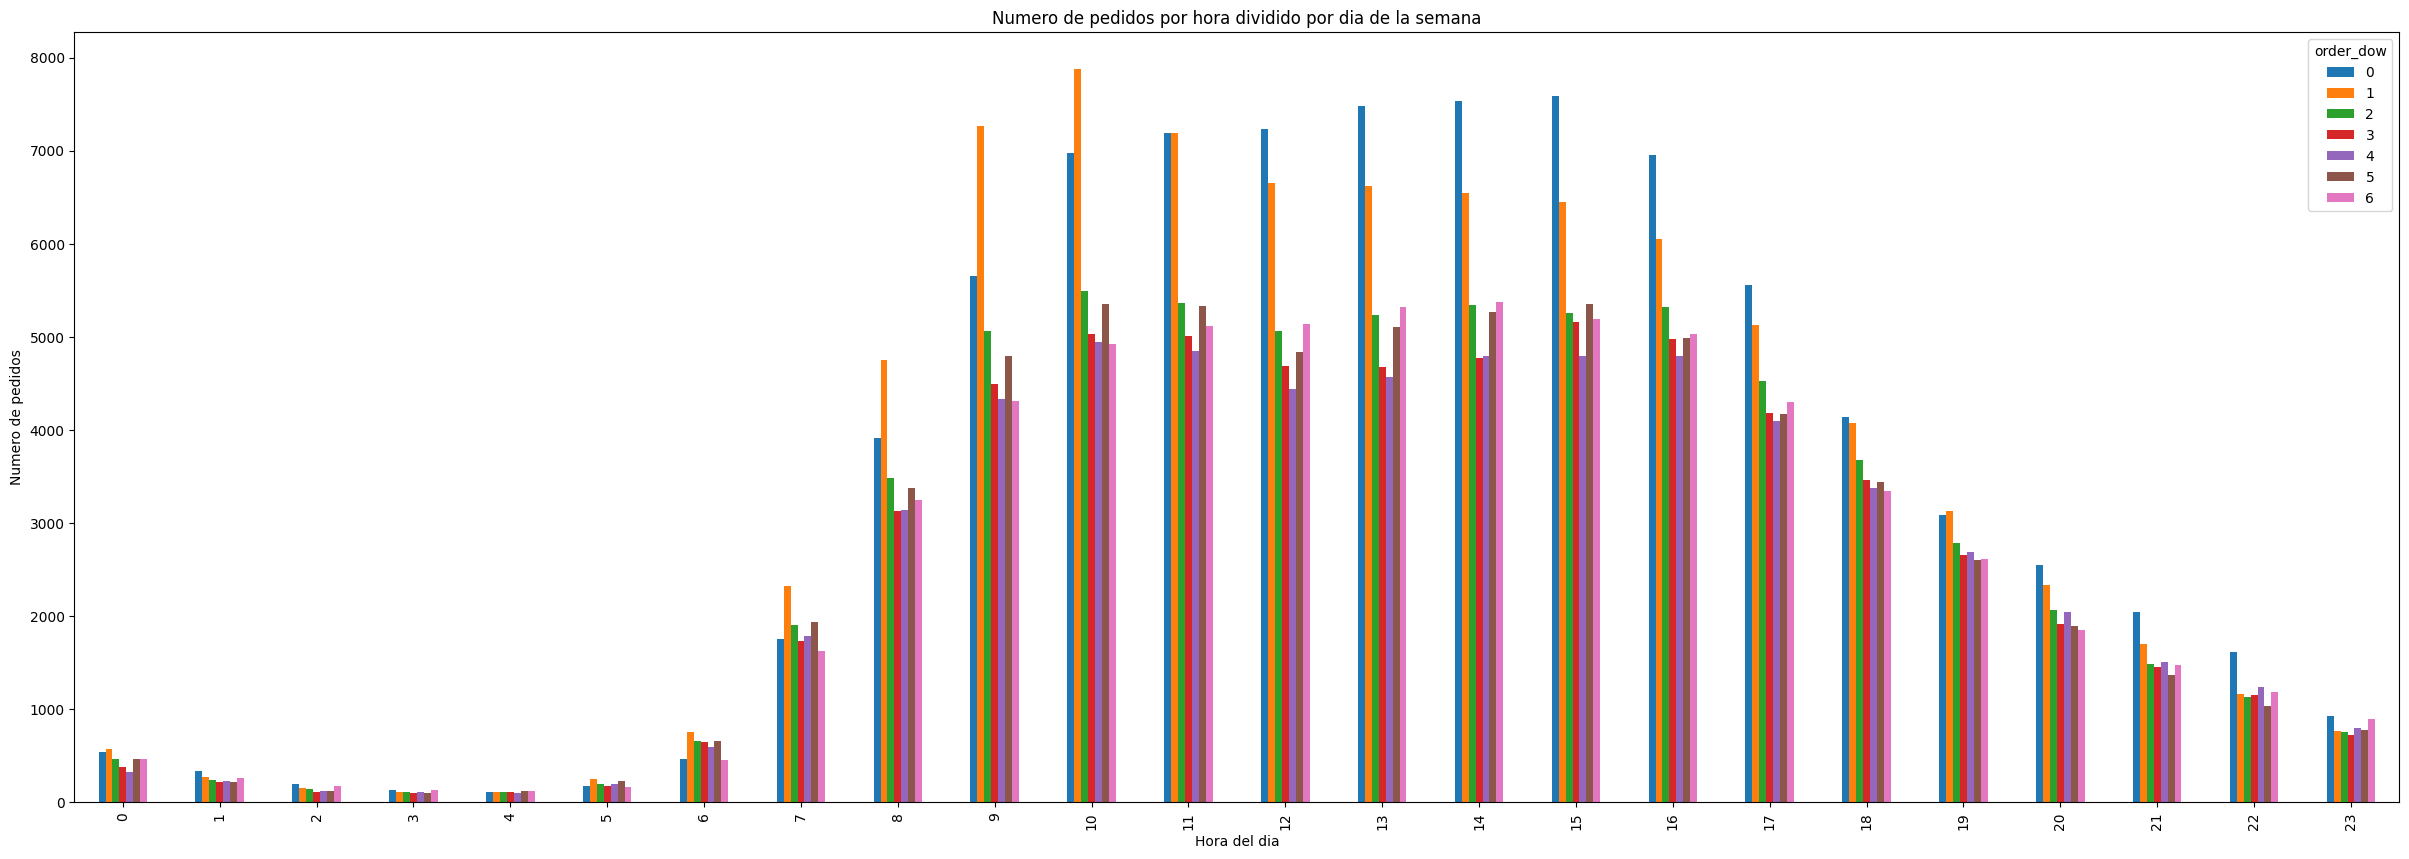

In [63]:
hour_per_day = df_1.groupby(['order_hour_of_day', 'order_dow']).size().unstack()
hour_per_day.plot(kind='bar', xlabel='Hora del dia', ylabel='Numero de pedidos', title='Numero de pedidos por hora dividido por dia de la semana', figsize=(30, 10))


<Axes: title={'center': 'Numero de pedidos por hora dividido por dia de la semana'}, xlabel='Hora del dia', ylabel='Numero de pedidos'>

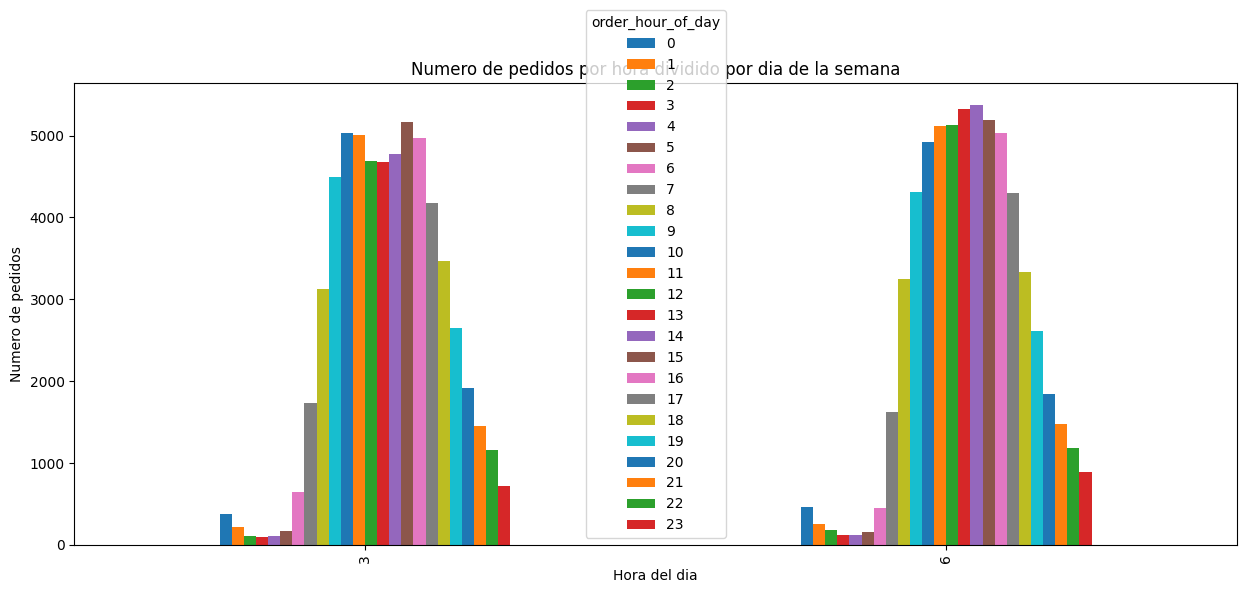

In [66]:
filtered_days_specific = df_1[df_1['order_dow'].isin([3, 6])]
filtered_days_specific_grouped = filtered_days_specific.groupby(['order_dow', 'order_hour_of_day']).size().unstack()
filtered_days_specific_grouped.plot(kind='bar', xlabel='Hora del dia', ylabel='Numero de pedidos', title='Numero de pedidos por hora dividido por dia de la semana', figsize=(15, 6))

Escribe aquí tus conclusiones

Podemos observar dia con día cada uno, y ver que la diferencia está solamente en temas mínimos, el sábado tiene más actividad por el medio día y el miércoles un poco más de actividad después de medio día, pero en terminos reales ,a distribución de la grafica parece conservarse relativamente normal, a diferencia de los lunes a las 10 de la mañana que muestra ser el día con el horario más ocupado por bastante, el resto de los días muestran una tendencia más o menos semejante. La única otra diferencia que podría ser relevante es que el sábado parece ser más ocupado por las tardes noches por poco, comparativamente con el miércoles, que madrugada y tardes noches tiene nominalmente menos ocupación.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<Axes: title={'center': 'Distribucion de pedidos por cliente'}, xlabel='Numero de pedidos', ylabel='Numero de clientes'>

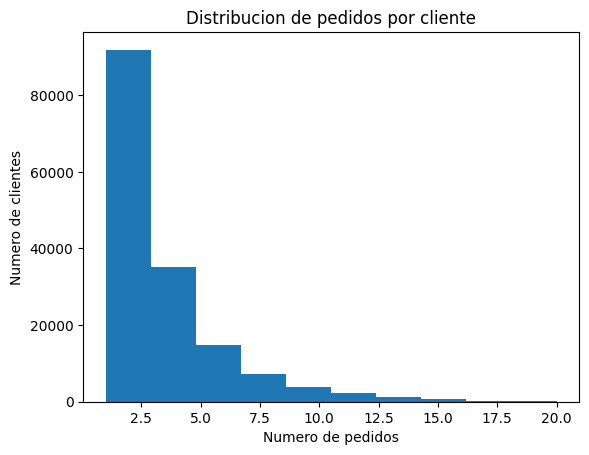

In [68]:
order_per_client = df_1.groupby('user_id')['order_id'].count()
order_per_client.plot(kind='hist', xlabel='Numero de pedidos', ylabel='Numero de clientes', title='Distribucion de pedidos por cliente', bins=10, range=(1, 20))

Escribe aquí tus conclusiones. La grafica nos muestra que la mayoria de los clientes solamente ordenaron una vez, y no han logrado retomar más adelante, siendo que arriba de 80 mil usuarios han pedido solo una vez. Por otro lado parece que no se ha logrado una lealtad a la plataforma como para que hayan muchos pedidos por una sola persona, ya que podríamos compararnos con Rappi o Uber eats en donde seguro encontraremos usuarios con más de 100 pedidos, y aquí no parece haber una tendencia así. Por otro lado hay que ponernos en contexto y valdría la pena en otro analisis profundizar sobre los que han pedido poco, si son nuevos, o si llevan más de 30 días sin pedir, revisar si hay algún comportamiento en común de por qué no y tratar de incentivarlos a que consuman de nuevo.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
product_counts = df_3.groupby('product_id').size().reset_index(name='count')
top_products = product_counts.sort_values(by='count', ascending=False)
top_20_products = top_products.head(20)
top_20_products_with_name = top_20_products.merge(df_2, on='product_id', how='left')
print(top_20_products_with_name[['product_id', 'product_name', 'count']])


    product_id              product_name  count
0        24852                    Banana  66050
1        13176    Bag of Organic Bananas  53297
2        21137      Organic Strawberries  37039
3        21903      Organic Baby Spinach  33971
4        47209      Organic Hass Avocado  29773
5        47766           Organic Avocado  24689
6        47626               Large Lemon  21495
7        16797              Strawberries  20018
8        26209                     Limes  19690
9        27845        Organic Whole Milk  19600
10       27966       Organic Raspberries  19197
11       22935      Organic Yellow Onion  15898
12       24964            Organic Garlic  15292
13       45007          Organic Zucchini  14584
14       39275       Organic Blueberries  13879
15       49683            Cucumber Kirby  13675
16       28204        Organic Fuji Apple  12544
17        5876             Organic Lemon  12232
18        8277  Apple Honeycrisp Organic  11993
19       40706    Organic Grape Tomatoes

Escribe aquí tus conclusiones: Todos los productos más populares son frutas o verduras, en su mayoría con el "label" organico, siendo las bananas las que dominan por un margen bastante importante, esto puede deberse a la época del año por la que fue sacada la muestra de los datos donde la gente pide fruta de temporada, pero no estamos seguros. por otro lado el resto de los productos por bastante son menos pedidos aunque estén entre los más populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<Axes: title={'center': 'Distribución del número de artículos por pedido'}, xlabel='Número de artículos en un pedido', ylabel='Frecuencia'>

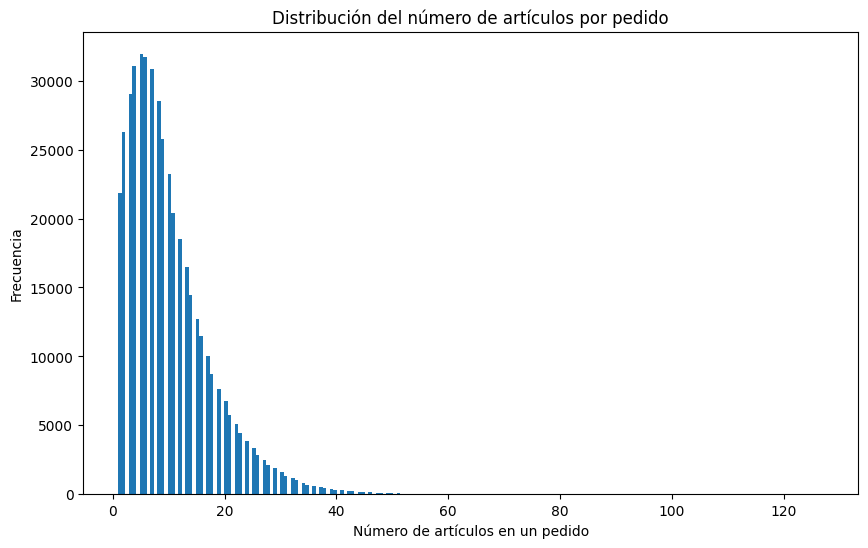

In [81]:

items_per_order = df_3.groupby('order_id')['product_id'].count()

items_per_order.plot(kind='hist', bins=200, figsize=(10, 6), xlabel='Número de artículos en un pedido', ylabel='Frecuencia', title='Distribución del número de artículos por pedido')
# Graficar la distribución como un histograma



Escribe aquí tus conclusiones: Los pedidos por lo general contienen de 1 a 15 productos, entendiendo que más que eso se empieza a convertir en una tendencia rara, por lo que la mayoría de las personas están pidiendo bananas al por mayor.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
reordered_products = df_3[df_3['reordered'] == 1]
reordered_counts = reordered_products.groupby('product_id').size().reset_index(name='count')
top_reordered = reordered_counts.sort_values(by='count', ascending=False).head(20)
top_reordered_with_name = top_reordered.merge(df_2, on='product_id', how='left')
print(top_reordered_with_name[['product_id', 'product_name', 'count']])


    product_id              product_name  count
0        24852                    Banana  55763
1        13176    Bag of Organic Bananas  44450
2        21137      Organic Strawberries  28639
3        21903      Organic Baby Spinach  26233
4        47209      Organic Hass Avocado  23629
5        47766           Organic Avocado  18743
6        27845        Organic Whole Milk  16251
7        47626               Large Lemon  15044
8        27966       Organic Raspberries  14748
9        16797              Strawberries  13945
10       26209                     Limes  13327
11       22935      Organic Yellow Onion  11145
12       24964            Organic Garlic  10411
13       45007          Organic Zucchini  10076
14       49683            Cucumber Kirby   9538
15       28204        Organic Fuji Apple   8989
16        8277  Apple Honeycrisp Organic   8836
17       39275       Organic Blueberries   8799
18        5876             Organic Lemon   8412
19       49235       Organic Half & Half

Escribe aquí tus conclusiones: Esto es coincidente con los artículos más pedidos, las bananas dominan el tema, y la mayoría de los productos son exclusivamente frutas y verduras, por lo que podríamos decir que en esta plataforma lo fuerte es esto, la pregunta seria a ventas seria ¿esto es lo que se está buscando?

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [84]:
total_orders = df_3.groupby('product_id').size().reset_index(name='total_orders')
reordered_orders = df_3[df_3['reordered'] == 1].groupby('product_id').size().reset_index(name='reordered_count')
product_proportions = pd.merge(total_orders, reordered_orders, on='product_id', how='left')
product_proportions['reordered_count'] = product_proportions['reordered_count'].fillna(0)
product_proportions['proportion_ordered'] = product_proportions['total_orders'] / product_proportions['total_orders'].sum()
product_proportions['proportion_reordered'] = product_proportions['reordered_count'] / product_proportions['total_orders']
product_proportions = pd.merge(product_proportions, df_2[['product_id', 'product_name']], on='product_id', how='left')
print(product_proportions[['product_id', 'product_name', 'proportion_ordered', 'proportion_reordered']].sort_values(by='proportion_ordered', ascending=False).head(20))




       product_id              product_name  proportion_ordered  \
22808       24852                    Banana            0.014532   
12025       13176    Bag of Organic Bananas            0.011726   
19370       21137      Organic Strawberries            0.008149   
20077       21903      Organic Baby Spinach            0.007474   
43271       47209      Organic Hass Avocado            0.006551   
43788       47766           Organic Avocado            0.005432   
43663       47626               Large Lemon            0.004729   
15364       16797              Strawberries            0.004404   
24047       26209                     Limes            0.004332   
25556       27845        Organic Whole Milk            0.004312   
25666       27966       Organic Raspberries            0.004224   
21025       22935      Organic Yellow Onion            0.003498   
22908       24964            Organic Garlic            0.003365   
41244       45007          Organic Zucchini            0.00320

Escribe aquí tus conclusiones: Aquí vuelven a aparecer los productos de frutas y verduras, empezando con los más pedidos, y es interesante ver que aunque el número neto de la proporción de veces que se ordena es chica, la proporción de reordenarlo es considerable, tomando en cuenta que solo el 1% de los pedidos tendrá bananas, pero cuando se pidieron ya bananas es mas de un 80% de probabilidad que el usuario las vuelva a pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [93]:
user_orders = pd.merge(df_3, df_1[['order_id', 'user_id']], on='order_id')

total_products_per_user = user_orders.groupby('user_id').size().reset_index(name='total_products')

reordered_products_per_user = user_orders[user_orders['reordered'] == 1].groupby('user_id').size().reset_index(name='reordered_count')

user_reorder_proportion = pd.merge(total_products_per_user, reordered_products_per_user, on='user_id', how='left')

user_reorder_proportion['reordered_count'] = user_reorder_proportion['reordered_count'].fillna(0)
user_reorder_proportion['reorder_proportion'] = user_reorder_proportion['reordered_count'] / user_reorder_proportion['total_products']
user_reorder_proportion = user_reorder_proportion.sort_values(by='reorder_proportion', ascending=False)

# Mostrar el resultado final ordenado de manera clara
print(user_reorder_proportion[['user_id', 'total_products', 'reordered_count', 'reorder_proportion']].head(20))

print(user_reorder_proportion['reorder_proportion'].mean())




        user_id  total_products  reordered_count  reorder_proportion
149589   206164               1              1.0                 1.0
13072     17973               2              2.0                 1.0
142827   196795               6              6.0                 1.0
142825   196792               9              9.0                 1.0
142824   196791              17             17.0                 1.0
13127     18048               7              7.0                 1.0
12980     17849               1              1.0                 1.0
142802   196759              17             17.0                 1.0
98293    135680               3              3.0                 1.0
98685    136211               1              1.0                 1.0
98684    136206               5              5.0                 1.0
98326    135720               4              4.0                 1.0
98383    135804               2              2.0                 1.0
98380    135800               5   

Escribe aquí tus conclusiones: casi la mitad de los pedidos incluyen productos reordenados en este caso

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [87]:
first_items = df_3[df_3['add_to_cart_order'] == 1]
first_item_counts = first_items.groupby('product_id').size().reset_index(name='count')
top_first_items = first_item_counts.sort_values(by='count', ascending=False).head(20)
top_first_items_with_name = top_first_items.merge(df_2, on='product_id', how='left')
print(top_first_items_with_name[['product_id', 'product_name', 'count']])


    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17        5785  Organic Reduced Fat 2% Milk   1310
18       27086                 

Escribe aquí tus conclusiones: Esto sigue yendo en lógica con lo anteriormente encontrado, la gente entra a esta aplicación para comprar por lo general frutas y verduras, y revela que la gente es lo primero que está buscnado, junto con otro conjunto de alimentos como half and half, leche sin grasa, agua mineral, pero predominantemente frutas y verduras, por lo que es indudablemente el fuerte de la plataforma.

### Conclusion general del proyecto:

El fuerte de la plataforma se encuentra en las frutas y verduras, mostrando que tiene mucha posibilidad en este tema podría desarrollar algún formato especial para esto, y que los clientes exploten al maximo el tema, así como que podría tener alguna ventaja con frutas de temporada, aprovechando específicamente que las bananas se venden como pan caliente.